#### Decision Tree Exercises

In [73]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import acquire
import prepare

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Using titanic data
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

In [4]:
train.sample(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
129,129,0,3,male,45.000000,0,0,6.9750,S,Third,Southampton,1,0,1
515,515,0,1,male,47.000000,0,0,34.0208,S,First,Southampton,1,0,1
656,656,0,3,male,29.916875,0,0,7.8958,S,Third,Southampton,1,0,1
889,889,1,1,male,26.000000,0,0,30.0000,C,First,Cherbourg,1,0,0
289,289,1,3,female,22.000000,0,0,7.7500,Q,Third,Queenstown,1,1,0


In [5]:
train.shape

(497, 14)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 497 entries, 583 to 553
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  497 non-null    int64  
 1   survived      497 non-null    int64  
 2   pclass        497 non-null    int64  
 3   sex           497 non-null    object 
 4   age           497 non-null    float64
 5   sibsp         497 non-null    int64  
 6   parch         497 non-null    int64  
 7   fare          497 non-null    float64
 8   embarked      497 non-null    object 
 9   class         497 non-null    object 
 10  embark_town   497 non-null    object 
 11  alone         497 non-null    int64  
 12  Q             497 non-null    uint8  
 13  S             497 non-null    uint8  
dtypes: float64(2), int64(6), object(4), uint8(2)
memory usage: 51.4+ KB


#### Using the titanic data, in your classification-exercises repository, create a notebook, model.ipynb where you will do the following:

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

5. Run through steps 2-4 using a different max_depth value.

6. Which model performs better on your in-sample data?

7. Which model performs best on your out-of-sample data, the validate set?

In [7]:
train.survived.value_counts()

0    307
1    190
Name: survived, dtype: int64

In [8]:
# set a baseline column equaling 0, the most common value in survived (died)
train['baseline'] = 0

In [9]:
# create a classification report for the baseline model
print(classification_report(train.survived, train.baseline))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       0.00      0.00      0.00       190

    accuracy                           0.62       497
   macro avg       0.31      0.50      0.38       497
weighted avg       0.38      0.62      0.47       497



Accuracy for baseline model is 62%

In [10]:
# make a flag column for sex to convert sex from string to bool for decision tree
train['is_female'] = (train.sex.str.contains('f'))
validate['is_female'] = (validate.sex.str.contains('f'))
test['is_female'] = (test.sex.str.contains('f'))

In [11]:
train.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,baseline,is_female
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,0,False
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,0,True
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,0,False
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,0,True
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,0,True


In [12]:
# assigning x and y for our model from the split dataframe
x_train, y_train = train.drop(columns=['survived', 'sex', 'embarked', 'class', 'embark_town']), train['survived']
x_validate, y_validate = validate.drop(columns=['survived', 'sex', 'embarked', 'class', 'embark_town']), validate['survived']
x_test, y_test = test.drop(columns=['survived', 'sex', 'embarked', 'class', 'embark_town']), test['survived']

In [13]:
# assign my classifier variable
clf = DecisionTreeClassifier(max_depth=6, random_state=123)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=123)

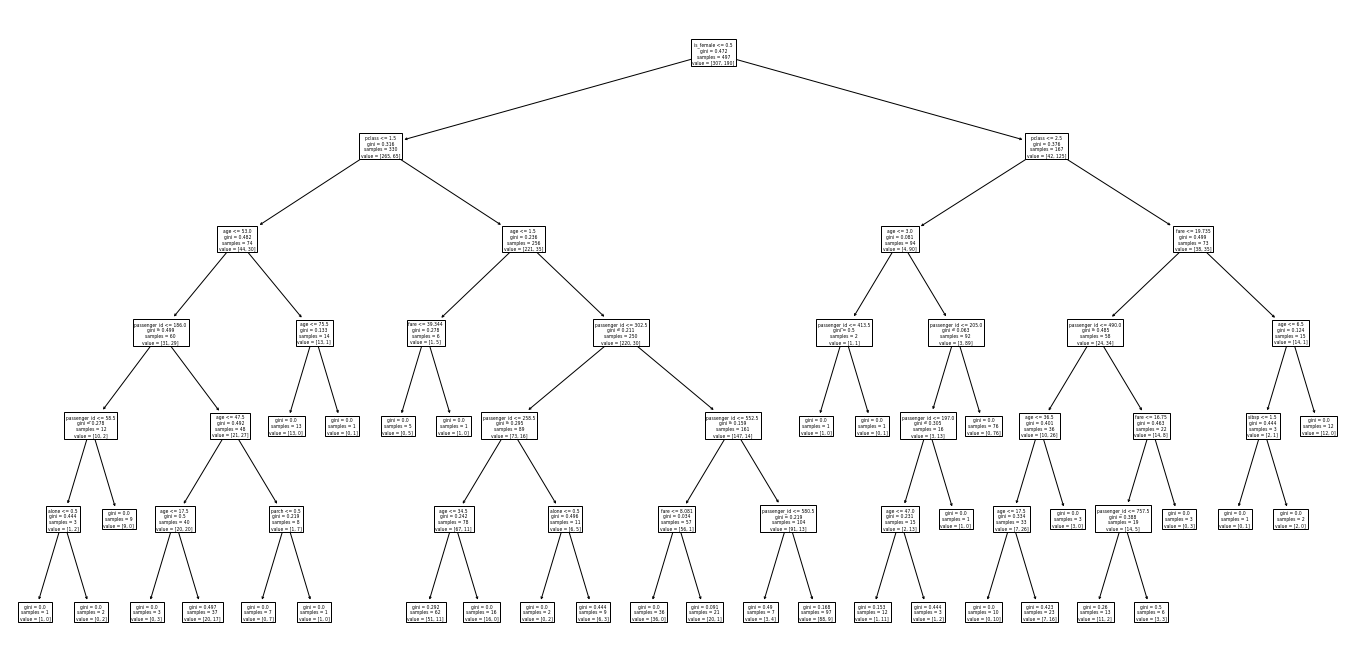

In [14]:
plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=x_train.columns
)
plt.show()

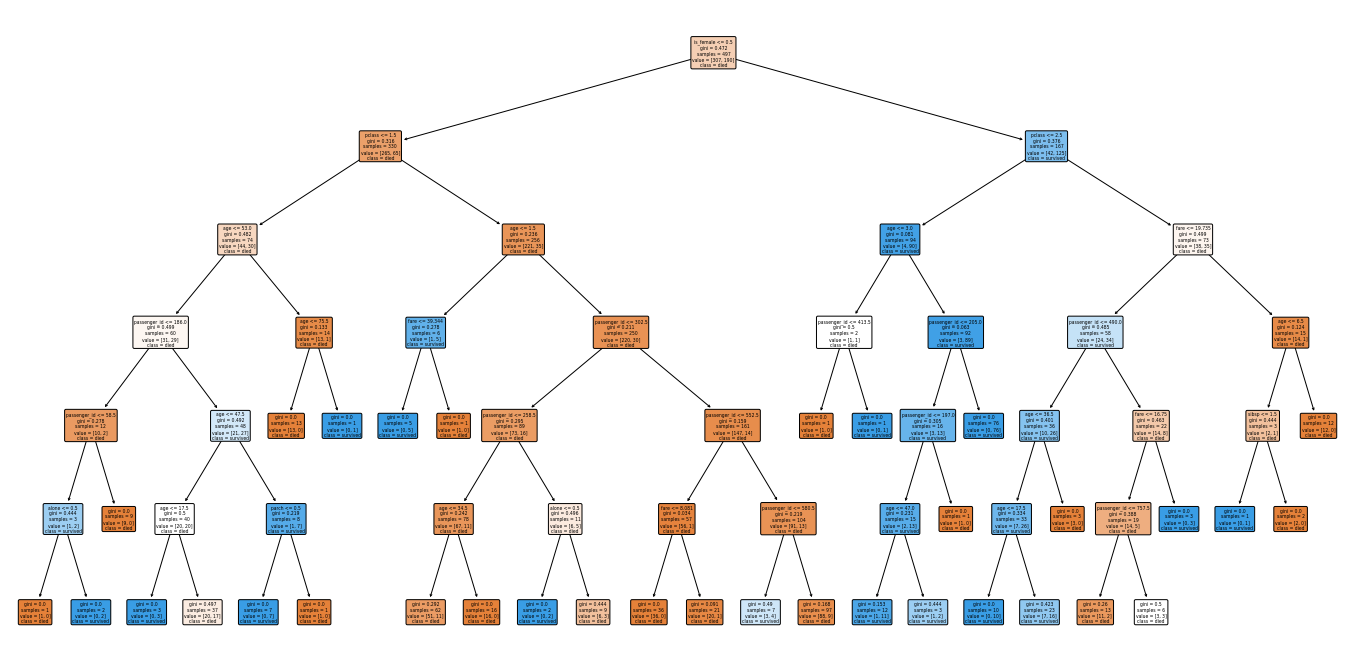

In [15]:
# make it pretty
plt.figure(figsize=(24, 12))
plot_tree(
    clf,
    feature_names=x_train.columns.tolist(),
    class_names=['died', 'survived'],
    filled=True,
    rounded=True
)
plt.show()

In [16]:
# make predictions
y_pred = clf.predict(x_train)
y_pred[0:5]

array([0, 1, 0, 1, 1])

In [17]:
# estimate probability
y_pred_proba = clf.predict_proba(x_train)
y_pred_proba[0:5]

array([[0.54054054, 0.45945946],
       [0.        , 1.        ],
       [0.82258065, 0.17741935],
       [0.        , 1.        ],
       [0.08333333, 0.91666667]])

In [18]:
# compute the accuracy
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(x_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.88


In [19]:
# create a confusion matrix
confusion_matrix(y_train, y_pred)

array([[295,  12],
       [ 46, 144]])

Refresh:

Precision: the higher this number is, the more you were able to pinpoint all positives correctly. If this is a low score, you predicted a lot of positives where there were none. 
$T
P
/
(
T
P
+
F
P
)$

Recall: if this score is high, you didn’t miss a lot of positives. But as it gets lower, you are not predicting the positives that are actually there. 
$T
P
/
(
T
P
+
F
N
)$

f1-score: The balanced harmonic mean of Recall and Precision, giving both metrics equal weight. The higher the F-Measure is, the better. 
∈
[
0
,
1
]

Support: number of occurrences of each class in where y is true.

In [20]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91       307
           1       0.92      0.76      0.83       190

    accuracy                           0.88       497
   macro avg       0.89      0.86      0.87       497
weighted avg       0.89      0.88      0.88       497



## Random Forest Exercises

1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [21]:
# bring in titanic data again
train, validate, test = prepare.prep_titanic(acquire.get_titanic_data())

In [22]:
train.sample(5)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S
359,359,1,3,female,29.916875,0,0,7.8792,Q,Third,Queenstown,1,1,0
67,67,0,3,male,19.000000,0,0,8.1583,S,Third,Southampton,1,0,1
282,282,0,3,male,16.000000,0,0,9.5000,S,Third,Southampton,1,0,1
147,147,0,3,female,9.000000,2,2,34.3750,S,Third,Southampton,0,0,1
448,448,1,3,female,5.000000,2,1,19.2583,C,Third,Cherbourg,0,0,0


In [23]:
# making a boolean column from the sex column
train['is_female'] = (train.sex.str.contains('f'))
validate['is_female'] = (validate.sex.str.contains('f'))
test['is_female'] = (test.sex.str.contains('f'))

In [24]:
# assigning x and y for our model from the split dataframe
x_train, y_train = train.drop(columns=['survived', 'sex', 'embarked', 'class', 'embark_town']), train['survived']
x_validate, y_validate = validate.drop(columns=['survived', 'sex', 'embarked', 'class', 'embark_town']), validate['survived']
x_test, y_test = test.drop(columns=['survived', 'sex', 'embarked', 'class', 'embark_town']), test['survived']

In [25]:
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=1,
                            max_depth=10,
                            random_state=123                           
                           )

In [26]:
# fit the model
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=123)

In [27]:
# evaluate importance
print(rf.feature_importances_)

[0.17710114 0.08825203 0.14495025 0.04651433 0.03155754 0.20996499
 0.0225557  0.00972908 0.02019953 0.24917541]


In [28]:
# make predictions
y_pred = rf.predict(x_train)
y_pred[:5]

array([0, 1, 0, 1, 1])

In [29]:
# Estimate probability
y_pred_proba = rf.predict_proba(x_train)
y_pred_proba[:5]

array([[0.75586673, 0.24413327],
       [0.        , 1.        ],
       [0.998181  , 0.001819  ],
       [0.        , 1.        ],
       [0.06666667, 0.93333333]])

2. Evaluate your results using the model score, confusion matrix, and classification report.

In [30]:
# compute the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.97


In [31]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.80


In [32]:
# create a classification report
confusion_matrix(y_train, y_pred)

array([[307,   0],
       [ 15, 175]])

In [33]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(307, 0, 15, 175)

In [34]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 175
False Positives 0
False Negatives 15
True Negatives 307
-------------
Accuracy is 0.9698189134808853
Recall is 0.9210526315789473
Precision is 1.0


#### Refresh:
Precision: 
$T
P
/
(
T
P
+
F
P
)$

Recall: 
$T
P
/
(
T
P
+
F
N
)$

F1-Score: A measure of accuracy. The harmonic mean of precision & recall. The harmonic mean is the reciprocal of the arithmetic mean of the reciprocals.\
Support: number of occurrences of each class.

In [35]:
# create a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       307
           1       1.00      0.92      0.96       190

    accuracy                           0.97       497
   macro avg       0.98      0.96      0.97       497
weighted avg       0.97      0.97      0.97       497



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [36]:
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.953416,1.000000,0.969819,0.976708,0.971225
recall,1.000000,0.921053,0.969819,0.960526,0.969819
f1-score,0.976153,0.958904,0.969819,0.967528,0.969559
support,307.000000,190.000000,0.969819,497.000000,497.000000


4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.



In [37]:
rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=2,
                            max_depth=8,
                            random_state=123                           
                           )

In [38]:
# fit the model
rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, random_state=123)

In [39]:
# evaluate importance
print(rf.feature_importances_)

[0.13275077 0.10444723 0.12553784 0.04633953 0.03021237 0.20637932
 0.02533619 0.00855746 0.01696822 0.30347106]


In [40]:
# make predictions
y_pred = rf.predict(x_train)
y_pred[:5]

array([0, 1, 0, 1, 1])

In [41]:
# Estimate probability
y_pred_proba = rf.predict_proba(x_train)
y_pred_proba[:5]

array([[0.66901112, 0.33098888],
       [0.01073092, 0.98926908],
       [0.93048024, 0.06951976],
       [0.02613816, 0.97386184],
       [0.16075974, 0.83924026]])

In [42]:
# compute the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.93


In [43]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.79


In [44]:
# create a classification report
confusion_matrix(y_train, y_pred)

array([[301,   6],
       [ 29, 161]])

In [45]:
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(301, 6, 29, 161)

In [46]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 161
False Positives 6
False Negatives 29
True Negatives 301
-------------
Accuracy is 0.9295774647887324
Recall is 0.8473684210526315
Precision is 0.9640718562874252


In [47]:
# create a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       307
           1       0.96      0.85      0.90       190

    accuracy                           0.93       497
   macro avg       0.94      0.91      0.92       497
weighted avg       0.93      0.93      0.93       497



In [48]:
## new model, diff hyperparameters

rf = RandomForestClassifier(bootstrap=True,
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=4,
                            max_depth=6,
                            random_state=123                           
                           )


# fit the model
rf.fit(x_train, y_train)

# evaluate importance
print(rf.feature_importances_)

# make predictions
y_pred = rf.predict(x_train)
y_pred[:5]

# Estimate probability
y_pred_proba = rf.predict_proba(x_train)
y_pred_proba[:5]

[0.09647662 0.11600321 0.09426982 0.04758703 0.02489501 0.20464988
 0.0233819  0.00785435 0.01278505 0.37209714]


array([[0.61056347, 0.38943653],
       [0.03263094, 0.96736906],
       [0.92595117, 0.07404883],
       [0.07904124, 0.92095876],
       [0.11747041, 0.88252959]])

In [49]:
# compute the accuracy
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(x_train, y_train)))

Accuracy of random forest classifier on training set: 0.88


In [50]:
print('Accuracy of random forest classifier on validate set: {:.2f}'
     .format(rf.score(x_validate, y_validate)))

Accuracy of random forest classifier on validate set: 0.79


In [51]:
# create a confusion matrix with labels
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(294, 13, 47, 143)

In [52]:
print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

True Positives 143
False Positives 13
False Negatives 47
True Negatives 294
-------------
Accuracy is 0.8792756539235412
Recall is 0.7526315789473684
Precision is 0.9166666666666666


In [53]:
# create a classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       307
           1       0.92      0.75      0.83       190

    accuracy                           0.88       497
   macro avg       0.89      0.86      0.87       497
weighted avg       0.88      0.88      0.88       497



5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

- Accuracy appears to go down the higher the min_samples and the lower tha max_depth.

- The first rf model works the best with the lowest min_samples and high max_depth.



## K Nearest Neighbor Exercises

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 2-4 setting k to 10

5. Run through setps 2-4 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

In [54]:
# Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [55]:
# make predictions
y_pred = knn.predict(x_train)
y_pred[:10]

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [56]:
# estimate probability
y_pred_proba = knn.predict_proba(x_train)
y_pred_proba[:5]

array([[1.  , 0.  ],
       [0.5 , 0.5 ],
       [0.75, 0.25],
       [0.25, 0.75],
       [0.75, 0.25]])

In [57]:
# 2. Evaluate your results using the model score, confusion matrix, and classification report.
# compute accuracy
print('Accuracy of KNN classifier on training set: ' + format(knn.score(x_train, y_train)))

Accuracy of KNN classifier on training set: 0.7525150905432596


In [58]:
# create confusion matrix
print(confusion_matrix(y_train, y_pred))

[[293  14]
 [109  81]]


In [59]:
F1_score = 2 * (precision * recall) / (precision + recall)
F1_score

0.8265895953757225

In [60]:
# create a classification report
tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()
tn, fp, fn, tp

(293, 14, 109, 81)

In [61]:
print('For n_neighbors=4:')

print("-------------")

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)
print('F1 score is', F1_score)
print('Support is 38%')

print("-------------")

print('Accuracy of KNN classifier on training set: ' + format(knn.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set:  '+ format(knn.score(x_validate, y_validate)))
print('Accuracy of KNN classifier on test set:  '+ format(knn.score(x_test, y_test)))

For n_neighbors=4:
-------------
True Positives 81
False Positives 14
False Negatives 109
True Negatives 293
-------------
Accuracy is 0.7525150905432596
Recall is 0.4263157894736842
Precision is 0.8526315789473684
F1 score is 0.8265895953757225
Support is 38%
-------------
Accuracy of KNN classifier on training set: 0.7525150905432596
Accuracy of KNN classifier on validate set:  0.6074766355140186
Accuracy of KNN classifier on test set:  0.5842696629213483


In [62]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.95      0.83       307
           1       0.85      0.43      0.57       190

    accuracy                           0.75       497
   macro avg       0.79      0.69      0.70       497
weighted avg       0.78      0.75      0.73       497



In [63]:
print('Accuracy of KNN classifier on validate set:  '+ format(knn.score(x_validate, y_validate)))

Accuracy of KNN classifier on validate set:  0.6074766355140186


In [64]:
# Run through steps 2-4 setting k to 10
print('For n_neighbors=10:')
print('-------------')
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)
y_pred_proba = knn.predict_proba(x_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print('-------------------------------------------')

print('Accuracy of KNN classifier on training set: ' + format(knn.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set:  '+ format(knn.score(x_validate, y_validate)))
print('Accuracy of KNN classifier on test set:  '+ format(knn.score(x_test, y_test)))

print('-------------------------------------------')

print(classification_report(y_train, y_pred))

For n_neighbors=10:
-------------
True Positives 66
False Positives 24
False Negatives 124
True Negatives 283
-------------
Accuracy is 0.7022132796780685
Recall is 0.3473684210526316
Precision is 0.7333333333333333
-------------------------------------------
Accuracy of KNN classifier on training set: 0.7022132796780685
Accuracy of KNN classifier on validate set:  0.6915887850467289
Accuracy of KNN classifier on test set:  0.6404494382022472
-------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.92      0.79       307
           1       0.73      0.35      0.47       190

    accuracy                           0.70       497
   macro avg       0.71      0.63      0.63       497
weighted avg       0.71      0.70      0.67       497



In [65]:
# Run through setps 2-4 setting k to 20
print('For n_neighbors=20:')
print('-------------')
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)
y_pred_proba = knn.predict_proba(x_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print('-------------------------------------------')

print('Accuracy of KNN classifier on training set: ' + format(knn.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set:  '+ format(knn.score(x_validate, y_validate)))
print('Accuracy of KNN classifier on test set:  '+ format(knn.score(x_test, y_test)))

print('-------------------------------------------')

print(classification_report(y_train, y_pred))

For n_neighbors=20:
-------------
True Positives 49
False Positives 18
False Negatives 141
True Negatives 289
-------------
Accuracy is 0.6800804828973843
Recall is 0.2578947368421053
Precision is 0.7313432835820896
-------------------------------------------
Accuracy of KNN classifier on training set: 0.6800804828973843
Accuracy of KNN classifier on validate set:  0.7009345794392523
Accuracy of KNN classifier on test set:  0.6348314606741573
-------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.94      0.78       307
           1       0.73      0.26      0.38       190

    accuracy                           0.68       497
   macro avg       0.70      0.60      0.58       497
weighted avg       0.69      0.68      0.63       497



In [66]:
print('For n_neighbors=2:')
print('-------------')
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_train)
y_pred_proba = knn.predict_proba(x_train)

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)

print('-------------------------------------------')

print('Accuracy of KNN classifier on training set: ' + format(knn.score(x_train, y_train)))
print('Accuracy of KNN classifier on validate set:  '+ format(knn.score(x_validate, y_validate)))
print('Accuracy of KNN classifier on test set:  '+ format(knn.score(x_test, y_test)))

print('-------------------------------------------')

print(classification_report(y_train, y_pred))

For n_neighbors=2:
-------------
True Positives 81
False Positives 0
False Negatives 109
True Negatives 307
-------------
Accuracy is 0.7806841046277666
Recall is 0.4263157894736842
Precision is 1.0
-------------------------------------------
Accuracy of KNN classifier on training set: 0.7806841046277666
Accuracy of KNN classifier on validate set:  0.6308411214953271
Accuracy of KNN classifier on test set:  0.5955056179775281
-------------------------------------------
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       307
           1       1.00      0.43      0.60       190

    accuracy                           0.78       497
   macro avg       0.87      0.71      0.72       497
weighted avg       0.84      0.78      0.75       497



In [67]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    accuracy = knn.score(x_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 59.55%
 2: 59.55%
 3: 56.18%
 4: 58.43%
 5: 58.43%
 6: 59.55%
 7: 58.43%
 8: 62.92%
 9: 61.80%
10: 64.04%
11: 62.36%
12: 61.80%


6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
- n_neigbors = 10 appears to be sweet spot for the best accuracy on this classification model

7. Which model performs best on our out-of-sample data from validate?
- Based off validation alone, n_neighbors = 20 is best for accuracy on the validate sample.

### Logistic Regression Exercises

1. Create a model that includes age in addition to fare and pclass. Does this model perform better than your baseline?

2. Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.

3. Try out other combinations of features and models.

4. Use you best 3 models to predict and evaluate on your validate sample.

5. Choose you best model from the validation performation, and evaluate it on the test dataset. How do the performance metrics compare to validate? to train?

In [69]:
train['baseline'] = 0

In [72]:
# create a classification report for the baseline model
print(classification_report(train.survived, train.baseline))

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       307
           1       0.00      0.00      0.00       190

    accuracy                           0.62       497
   macro avg       0.31      0.50      0.38       497
weighted avg       0.38      0.62      0.47       497



Baseline accuracy is 62%

In [71]:
# Include sex in your model as well. Note that you'll need to encode or create a dummy variable of this feature before including it in a model.
train.drop(columns = 'baseline')

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,embark_town,alone,Q,S,is_female
583,583,0,1,male,36.000000,0,0,40.1250,C,First,Cherbourg,1,0,0,False
337,337,1,1,female,41.000000,0,0,134.5000,C,First,Cherbourg,1,0,0,True
50,50,0,3,male,7.000000,4,1,39.6875,S,Third,Southampton,0,0,1,False
218,218,1,1,female,32.000000,0,0,76.2917,C,First,Cherbourg,1,0,0,True
31,31,1,1,female,29.916875,1,0,146.5208,C,First,Cherbourg,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313,313,0,3,male,28.000000,0,0,7.8958,S,Third,Southampton,1,0,1,False
636,636,0,3,male,32.000000,0,0,7.9250,S,Third,Southampton,1,0,1,False
222,222,0,3,male,51.000000,0,0,8.0500,S,Third,Southampton,1,0,1,False
485,485,0,3,female,29.916875,3,1,25.4667,S,Third,Southampton,0,0,1,True


In [74]:
# Create a model that includes age in addition to fare and pclass
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123)

In [77]:
logit.fit(x_train, y_train)

LogisticRegression(C=1, class_weight={0: 1, 1: 99}, random_state=123)

In [78]:
y_pred = logit.predict(x_train)
y_pred[:5]

array([1, 1, 1, 1, 1])

In [106]:
y_pred_proba = logit.predict_proba(x_train)
y_pred_proba[:5]

array([[3.40688651e-02, 9.65931135e-01],
       [4.69662199e-04, 9.99530338e-01],
       [1.54840167e-01, 8.45159833e-01],
       [9.62914772e-04, 9.99037085e-01],
       [2.28068512e-04, 9.99771931e-01]])

In [107]:
y_pred_proba = pd.DataFrame(y_pred_proba, columns= ['died', 'survived'])
y_pred_proba.head()

,died,survived
0,0.034069,0.965931
1,0.000470,0.999530
2,0.154840,0.845160
3,0.000963,0.999037
4,0.000228,0.999772


In [82]:
print(confusion_matrix(y_train, y_pred))

[[  4 303]
 [  0 190]]


In [83]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.01      0.03       307
           1       0.39      1.00      0.56       190

    accuracy                           0.39       497
   macro avg       0.69      0.51      0.29       497
weighted avg       0.77      0.39      0.23       497



In [98]:
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(x_validate, y_validate)))

Accuracy of Logistic Regression classifier on training set: 0.39
Accuracy of Logistic Regression classifier on validate set: 0.39


In [101]:
# Model 1
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123)
logit.fit(x_train, y_train)
y_pred = logit.predict(x_train)
y_pred_proba = logit.predict_proba(x_train)

print('-------------------------------------------')

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)


print(classification_report(y_train, y_pred))
      
print('-------------------------------------------')
      
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(x_validate, y_validate)))

-------------------------------------------
True Positives 190
False Positives 303
False Negatives 0
True Negatives 4
-------------
Accuracy is 0.3903420523138833
Recall is 1.0
Precision is 0.385395537525355
              precision    recall  f1-score   support

           0       1.00      0.01      0.03       307
           1       0.39      1.00      0.56       190

    accuracy                           0.39       497
   macro avg       0.69      0.51      0.29       497
weighted avg       0.77      0.39      0.23       497

-------------------------------------------
Accuracy of Logistic Regression classifier on training set: 0.39
Accuracy of Logistic Regression classifier on validate set: 0.39


In [105]:
# Model 2
logit = LogisticRegression(C=1, class_weight={0:1, 1:99}, random_state=123)
logit.fit(x_train, y_train)
y_pred = logit.predict(x_train)
y_pred_proba = logit.predict_proba(x_train)

print('-------------------------------------------')

tn, fp, fn, tp = confusion_matrix(y_train, y_pred).ravel()

print("True Positives", tp)
print("False Positives", fp)
print("False Negatives", fn)
print("True Negatives", tn)

print("-------------")

accuracy = (tp + tn) / (tp + tn + fp + fn)
recall = tp / (tp + fn)
precision = tp / (tp + fp)

print("Accuracy is", accuracy)
print("Recall is", recall)
print("Precision is", precision)


print(classification_report(y_train, y_pred))
      
print('-------------------------------------------')
      
print('Accuracy of Logistic Regression classifier on training set: {:.2f}'
     .format(logit.score(x_train, y_train)))
print('Accuracy of Logistic Regression classifier on validate set: {:.2f}'
     .format(logit.score(x_validate, y_validate)))

-------------------------------------------
True Positives 190
False Positives 303
False Negatives 0
True Negatives 4
-------------
Accuracy is 0.3903420523138833
Recall is 1.0
Precision is 0.385395537525355
              precision    recall  f1-score   support

           0       1.00      0.01      0.03       307
           1       0.39      1.00      0.56       190

    accuracy                           0.39       497
   macro avg       0.69      0.51      0.29       497
weighted avg       0.77      0.39      0.23       497

-------------------------------------------
Accuracy of Logistic Regression classifier on training set: 0.39
Accuracy of Logistic Regression classifier on validate set: 0.39
